In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'

MP 1/3
MP 2/3
MP 3/3
OMP 1/3
OMP 2/3
OMP 3/3


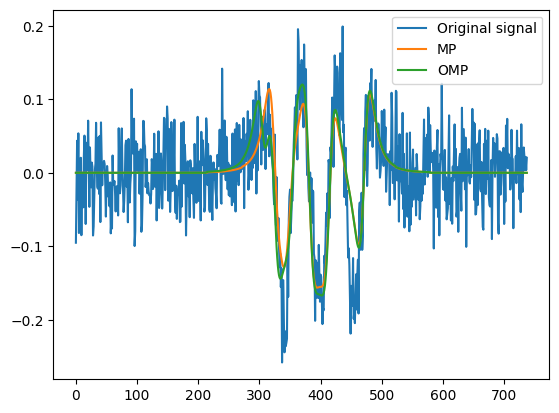

In [6]:
with open(input_signals_db, 'r') as json_file:
    data = json.load(json_file)
    if data is None:
        raise ValueError("The input file is empty or does not contain any data.")

# Extract the signals from the DB
signals = data['signals']
snr_level = 5

signal_dict = next((signal for signal in signals if signal['snr'] == snr_level), None)
signal_id = signal_dict['id']

mp_approx, infos = dictionary.mp(signal=signal_dict['signal'], sparsity_level=signal_dict['sparsity'], verbose=True)
omp_approx, infos = dictionary.omp(signal=signal_dict['signal'], sparsity_level=signal_dict['sparsity'], verbose=True)

# Plot the signals
plt.figure()
plt.plot(signal_dict['signal'], label='Original signal')
plt.plot(mp_approx, label='MP')
plt.plot(omp_approx, label='OMP')
plt.legend()
plt.show()